# Life Ladder Prediction


## Preliminaries

In [ ]:
# Basic dataframe and array manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Data preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Firstly, add dataset to the folder on the left
df = pd.read_csv('/content/happiness_data.csv')

# We are said to ignore year so let's drop it here
df = df.drop(columns='year')
df.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   Life Ladder                       1949 non-null   float64
 2   Log GDP per capita                1913 non-null   float64
 3   Social support                    1936 non-null   float64
 4   Healthy life expectancy at birth  1894 non-null   float64
 5   Freedom to make life choices      1917 non-null   float64
 6   Generosity                        1860 non-null   float64
 7   Perceptions of corruption         1839 non-null   float64
 8   Positive affect                   1927 non-null   float64
 9   Negative affect                   1933 non-null   float64
dtypes: float64(9), object(1)
memory usage: 152.4+ KB


*   There are 11 attributes as shown above. As for the amount of data, there are 1949 instances/rows in the dataset.
*   The 9 attributes printed below are continuous-valued:




In [ ]:
df.select_dtypes(include=['float64']).columns.tolist()

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [ ]:
df['Country name'].value_counts()

Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64

* The ***year*** and ***Country name*** are categorical attributes. The ***year*** is considered categorical, in spite of it being an integer, because it exists only in 16 unique values, and just by looking at the data, most of those values are repeated per country. The ***Country name*** is categorical because its values are repetitive, and for each country there is at least 1 entry.

## Basics

In [ ]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [ ]:
df.describe(include=object)

,Country name
count,1949
unique,166
top,Zimbabwe
freq,15


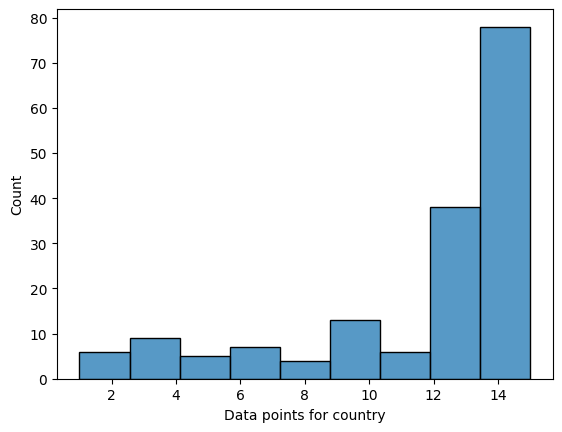

In [ ]:
fig = plt.figure(1)
sns.histplot(df['Country name'].value_counts())
plt.xlabel('Data points for country')
plt.show()

## Dropping countries with only single data point

As we can see that there are sevral countries with only single entry/ data point. We are removing these data points so that we have a blanced data during traning and testing

In [ ]:
df_ = df[df.groupby('Country name')['Country name'].transform('size') > 1].reset_index(drop = True)

In [ ]:
df_.shape

(1944, 10)

## Visualizing the data

In [ ]:
# Lets make a list of all the numerical attributes/ features in our data
numerical_features = [x for x in df_.columns if df_[x].dtypes == 'int64' or df_[x].dtypes == 'float64']

### Histograms

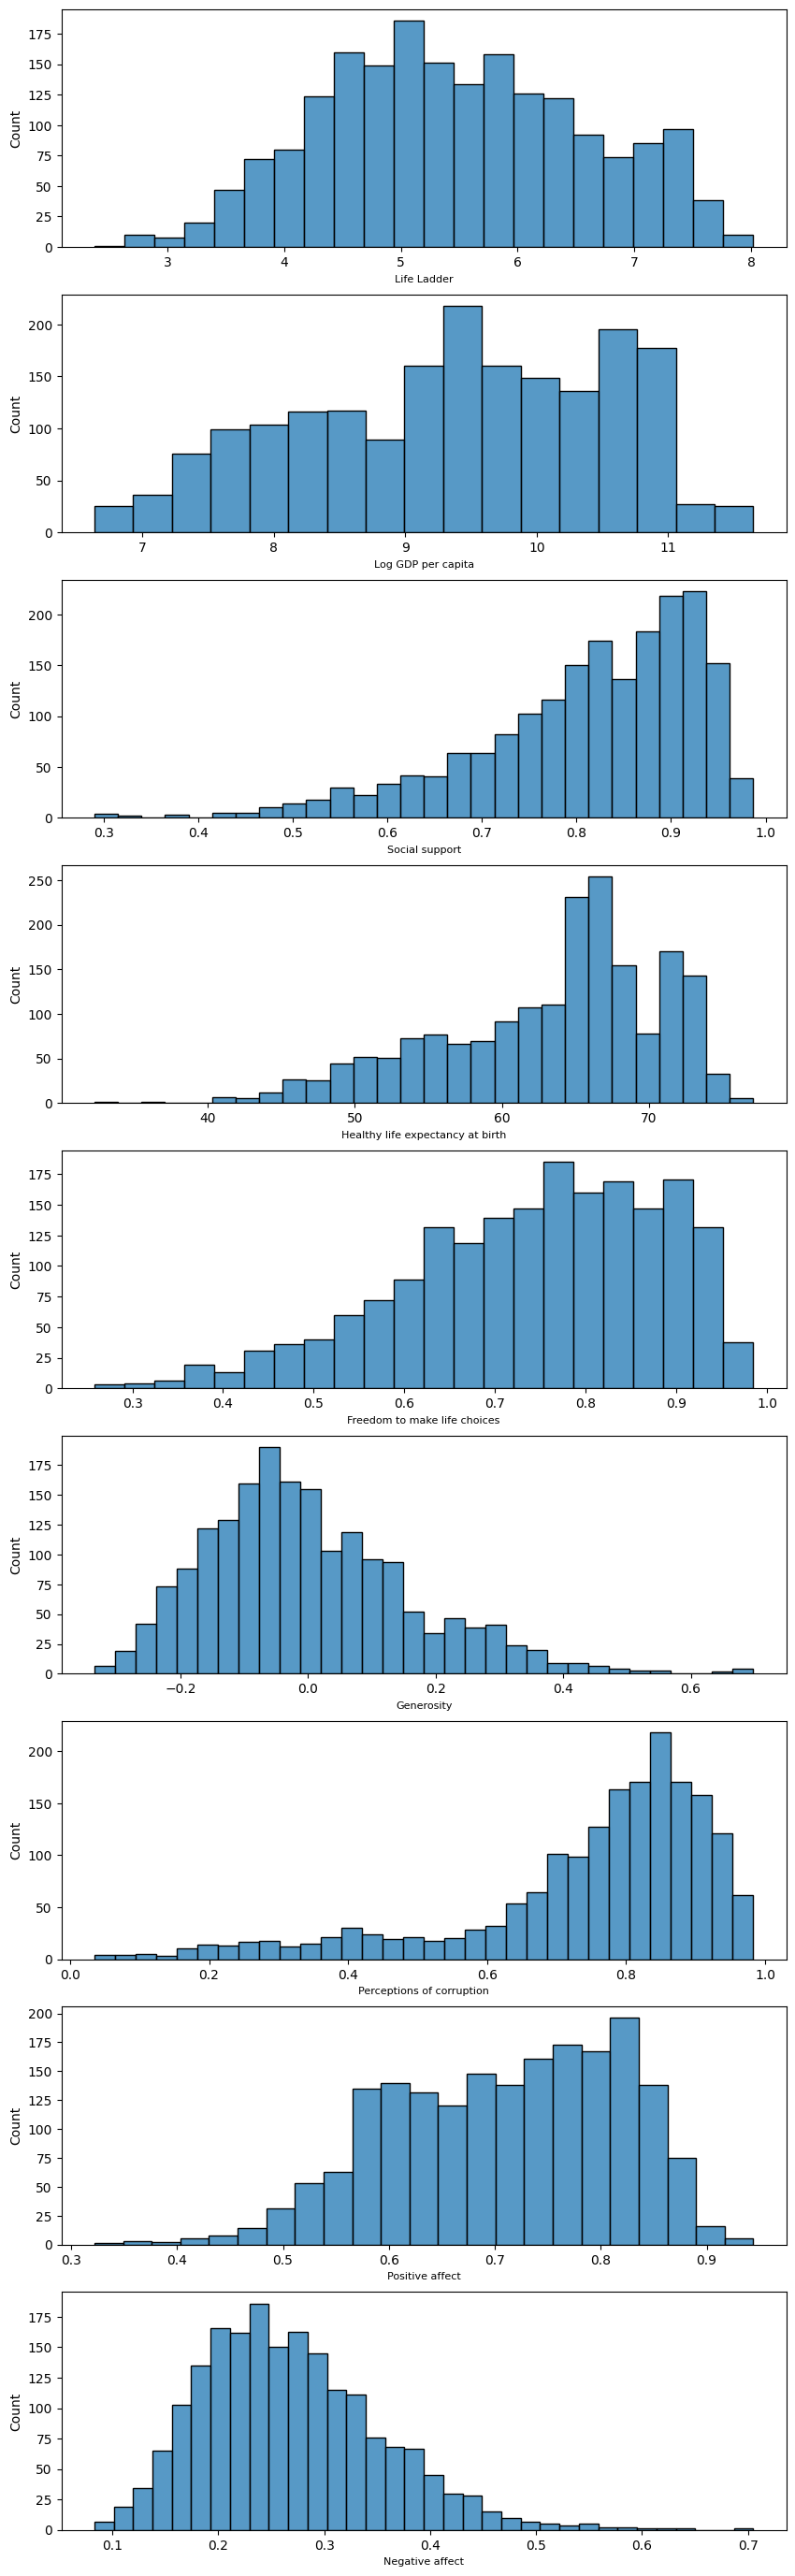

In [ ]:
# Code for plotting historgrams for the numerical features
fig, ax = plt.subplots(len(numerical_features), figsize = (10,35))

for i, feature in enumerate(numerical_features):
  sns.histplot(df_[feature], ax=ax[i])
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

### Boxplots

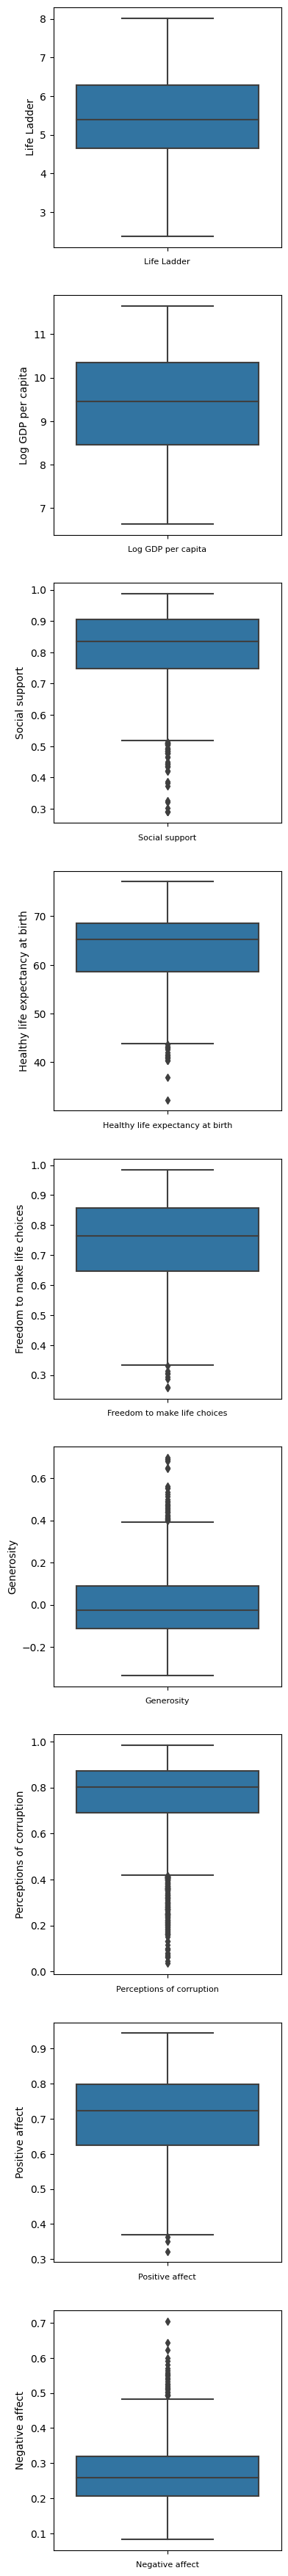

In [ ]:
# Code for plotting boxplots for all the numerical features in our data
fig, ax = plt.subplots(len(numerical_features), figsize = (4,45))

for i, feature in enumerate(numerical_features):
  sns.boxplot(y= df_[feature], ax=ax[i])
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

### Boxplot and Violin combo

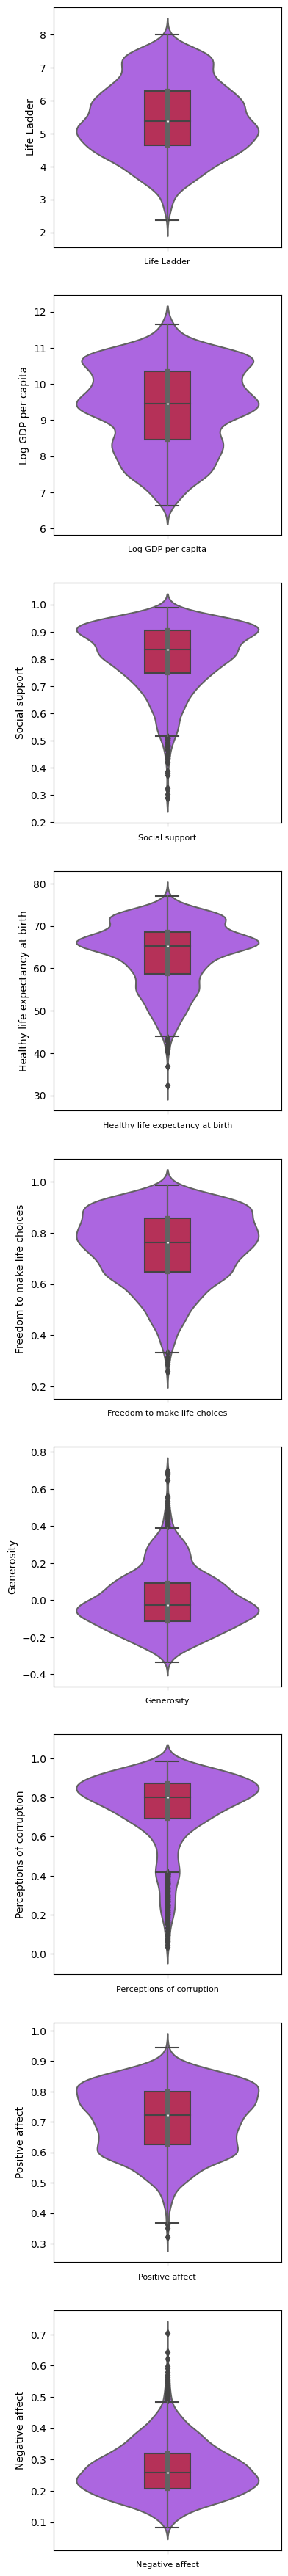

In [ ]:
# code for plotting violin +  boxplot for all numerical features in our data
fig, ax = plt.subplots(len(numerical_features), figsize = (4,45))

for i, feature in enumerate(numerical_features):
  sns.boxplot(y= df_[feature], ax=ax[i], boxprops={'zorder': 2}, width=0.2, palette='rocket')
  sns.violinplot(y= df_[feature], ax=ax[i], color = "#af52f4")
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

## Dealing with empty values

Lets look at the null/ empty values in each feature

In [ ]:
df_.isnull().sum()

Country name                          0
Life Ladder                           0
Log GDP per capita                   35
Social support                       12
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           88
Perceptions of corruption           107
Positive affect                      20
Negative affect                      15
dtype: int64

### Imputing missing values with local median

We are imputing the values of every variable by using individual country's median (instead of using the whole feature). For example Iran has missing values for Log GDP per capita for the years 2018, 2019, and 2020, we will replace these nans with median of Iran's log GDP per capita

In [ ]:
df_imputed = df_.copy()
countries = list(df_imputed['Country name'].unique())

for col in df_imputed.columns:
  for country in countries:
    if df_imputed[df_imputed['Country name'] == country][col].isna().sum() > 0:
      mask = df_imputed['Country name'] == country
      median = np.nanmedian(df_imputed[df_imputed['Country name'] == country][col])
      df_imputed.loc[mask, col] = df_imputed.loc[mask, col].fillna(median)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [ ]:
df_imputed.isnull().sum()

Country name                         0
Life Ladder                          0
Log GDP per capita                  18
Social support                       0
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          18
Perceptions of corruption           25
Positive affect                      0
Negative affect                      0
dtype: int64

We notice that there are still missing values. This is because country's all data points for a particular feature are missing

In [ ]:
df_imputed[df_imputed.isna().any(axis=1)]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
342,China,4.560,8.696,0.747,66.88,0.8385,-0.174,NaN,0.809,0.170
343,China,4.863,8.824,0.811,67.06,0.8385,-0.176,NaN,0.817,0.159
344,China,4.846,8.911,0.748,67.24,0.8530,-0.092,NaN,0.817,0.147
345,China,4.454,8.996,0.798,67.42,0.7710,-0.160,NaN,0.786,0.162
346,China,4.653,9.092,0.768,67.60,0.8050,-0.133,NaN,0.765,0.158
...,...,...,...,...,...,...,...,...,...,...
1768,Turkmenistan,5.791,9.472,0.960,61.00,0.7010,0.093,NaN,0.705,0.301
1769,Turkmenistan,5.887,9.515,0.929,61.40,0.7490,0.005,NaN,0.636,0.255
1770,Turkmenistan,5.229,9.561,0.908,61.80,0.7200,0.066,NaN,0.521,0.350
1771,Turkmenistan,4.621,9.605,0.984,62.20,0.8580,0.260,NaN,0.612,0.189


In [ ]:
df_imputed[df_imputed.isna().any(axis=1)].shape

(68, 10)

### Imputing missing values with global median

Since there is no way for us to impute the values of these variables as per their country statistics, we will assign them global median. For example, Cuba's Log GDP capita cannot be imputed because there was only one entry for Cuba and it was missing, so we will assign it the global median of Log GDP capita

In [ ]:
for col in df_imputed.columns:
  if col != 'Country name':
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

In [ ]:
df_imputed.isna().sum()

Country name                        0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

## One-hot encoding for the the feature "Country name"

No we will convert the country name into binary variables using hot encoding

In [ ]:
lb = LabelBinarizer()
lb.fit(df_imputed['Country name'])
enc_df = pd.DataFrame(lb.transform(df_imputed['Country name']))

In [ ]:
df_cleaned = enc_df.join(df_imputed)
df_cleaned.columns = df_cleaned.columns.astype(str)
df_cleaned.drop('Country name', axis = 1, inplace = True)

In [ ]:
df_cleaned.isna().sum()

0                               0
1                               0
2                               0
3                               0
4                               0
                               ..
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Positive affect                 0
Negative affect                 0
Length: 170, dtype: int64

In [ ]:
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,160,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,1,0,0,0,0,0,0,0,0,0,...,0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,1,0,0,0,0,0,0,0,0,0,...,0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,1,0,0,0,0,0,0,0,0,0,...,0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,1,0,0,0,0,0,0,0,0,0,...,0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,1,0,0,0,0,0,0,0,0,0,...,0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Let's firstly generate scatter plots and correlations coefficients


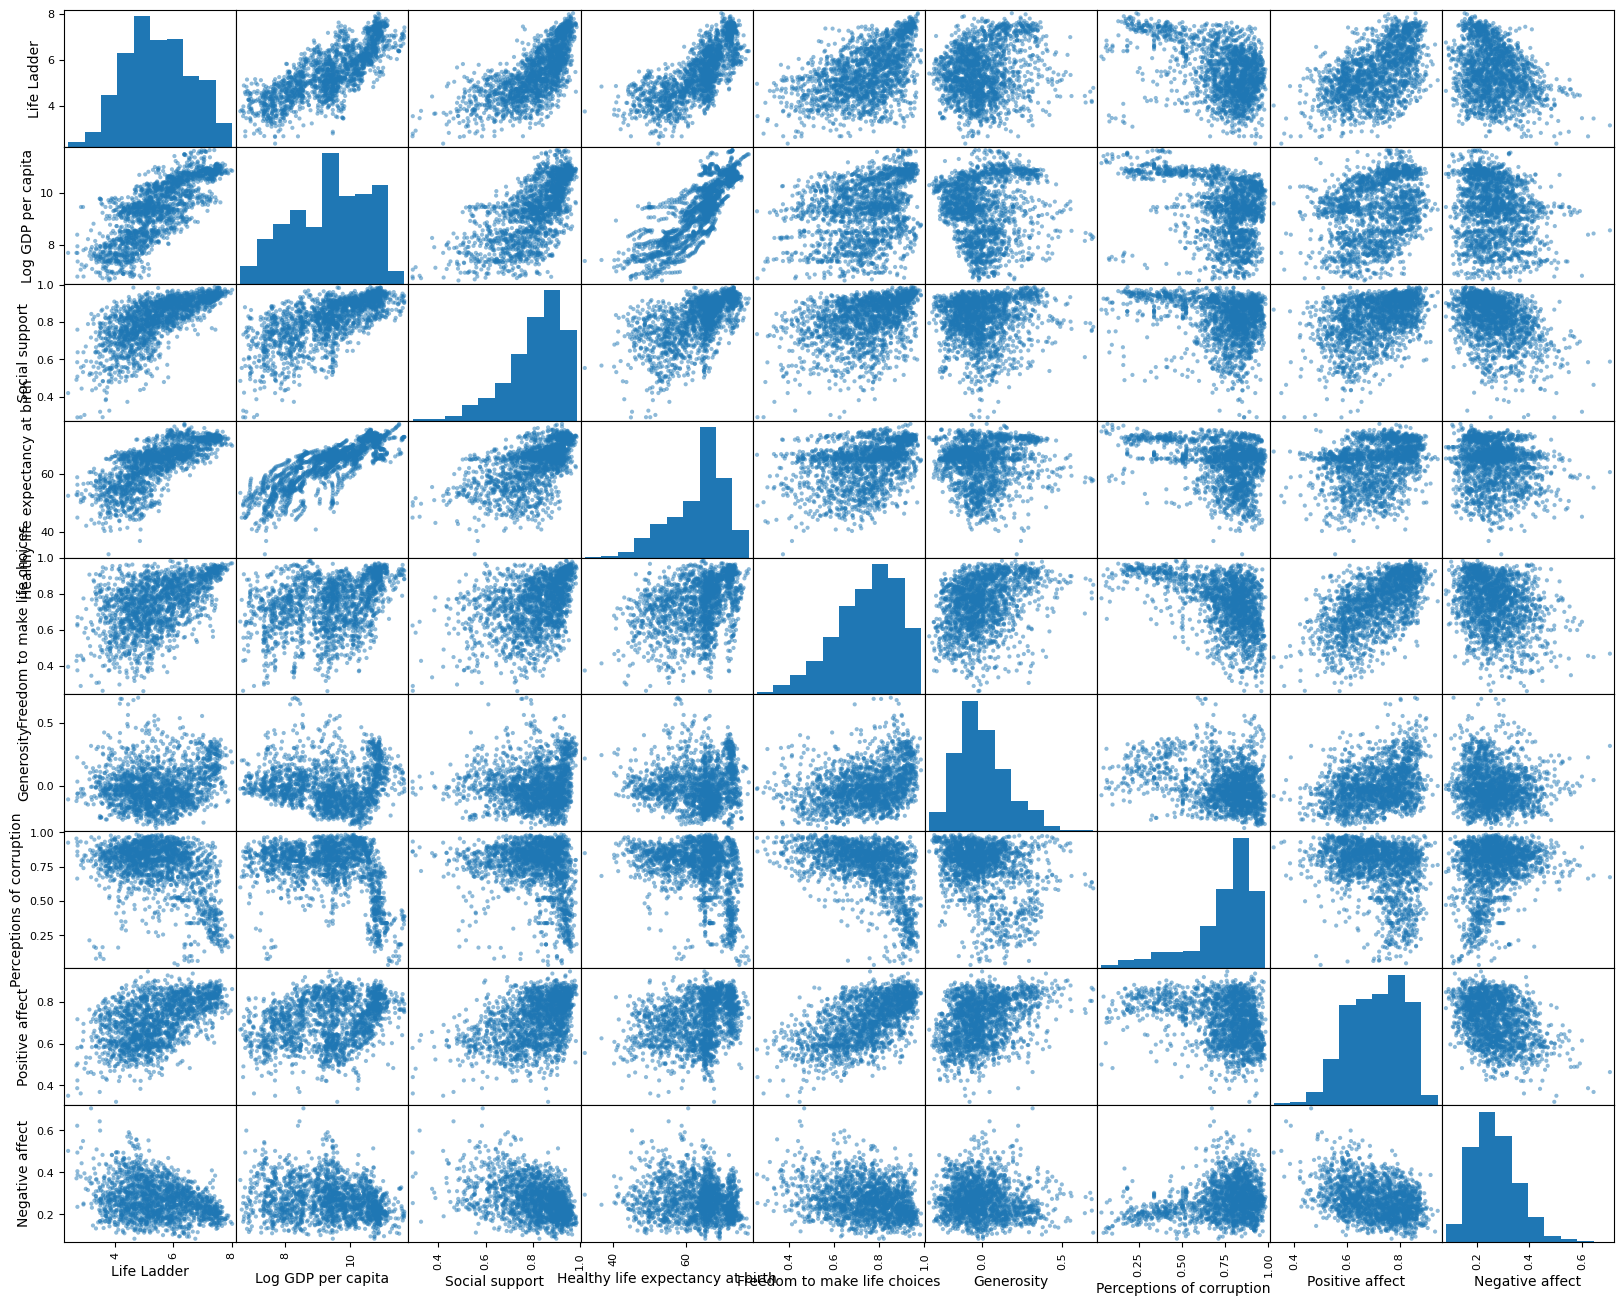

In [ ]:
scatter_matrix(df_cleaned[numerical_features], figsize=(20, 16))
plt.show()

In [ ]:
df_cleaned[numerical_features].corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.785832,0.708930,0.744871,0.523334,0.193522,-0.443009,0.532085,-0.297043
Log GDP per capita,0.785832,1.000000,0.684912,0.839419,0.361219,0.007860,-0.376225,0.302460,-0.205172
Social support,0.708930,0.684912,1.000000,0.615578,0.412984,0.069563,-0.226274,0.433539,-0.394618
Healthy life expectancy at birth,0.744871,0.839419,0.615578,1.000000,0.384564,0.029387,-0.321999,0.318838,-0.145451
Freedom to make life choices,0.523334,0.361219,0.412984,0.384564,1.000000,0.327155,-0.491224,0.606296,-0.268276
Generosity,0.193522,0.007860,0.069563,0.029387,0.327155,1.000000,-0.290381,0.352448,-0.086084
Perceptions of corruption,-0.443009,-0.376225,-0.226274,-0.321999,-0.491224,-0.290381,1.000000,-0.295969,0.241168
Positive affect,0.532085,0.302460,0.433539,0.318838,0.606296,0.352448,-0.295969,1.000000,-0.373753
Negative affect,-0.297043,-0.205172,-0.394618,-0.145451,-0.268276,-0.086084,0.241168,-0.373753,1.000000


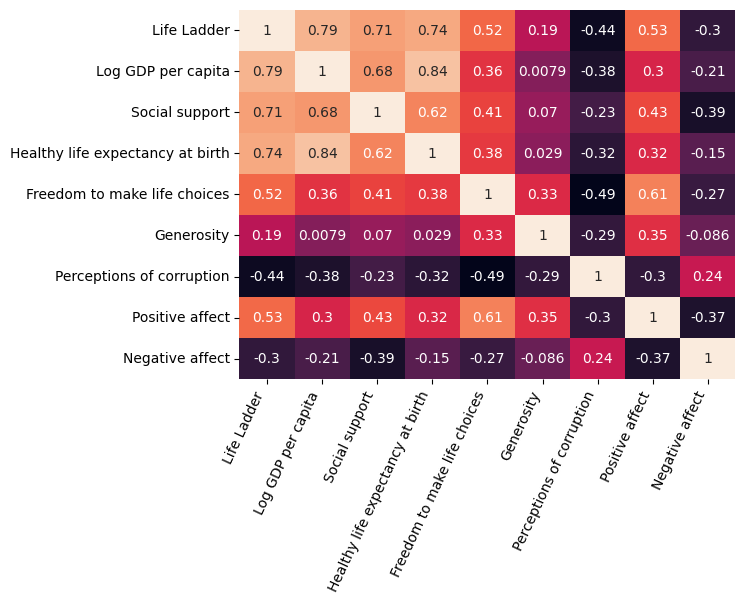

In [ ]:
sns.heatmap(df_cleaned[numerical_features].corr(method = 'pearson'), cbar = False, annot = True)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

Now, let me elaborate on the meaning of correlations.

As for the correlations between attributes, we can see that Log GDP per capita strongly correlates with the Life Expectancy at birth and social support. It can make sense because wealthier societies usually have access to better health technologies and can afford social support. All other attributes do not have a strong correlation. Still, I want to notice a higher variation in corruption perception for big GDP values, social support, life expectancy, and freedom. It probably could mean that not wealthy societies can be corrupted when rich societies can be both. We can see the decreasing corruption perception index pattern even when there is no strong correlation.

As for the relation between attributes and labels, we can see that greater social support, GDP per capita, freedom, life expectancy, positive affect positively correlate with the life ladder. In contrast, corruption and negative affect have a negative relationship. All these correlations have different powers, but they are still revealed. Only generosity does not have an effect, but it actually depends on what correlation index threshold we set. I would say that it does not affect the life ladder. All these correlations have an intuitive explanation because wealthier and more successful states have greater consumption and, therefore, more utility from life, and at the same time, positive emotions improve life quality, while negative increases stress.

## Categorizing GDP per capita

* ***Log GDP per capita*** is the most correlated attribute with the ***Life Ladder***. So, it can be quite indicative in predicting the ***Life Ladder***.
* To ensure that the test set is representative of the categories/ranges of GDP in the whole dataset, we create the following ***GDP_category*** attribute to capture categories of GDP (GDP is continuous).
* Looking back at the histogram of the GDP, it looks like most values range between 7 and 11. Thus, labeled from 1 to 6, are the following GDP categories:

In [ ]:
df_cleaned["GDP_category"] = pd.cut(df_cleaned["Log GDP per capita"],
                               bins=[0, 7, 8, 9, 10, 11, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

In [ ]:
df_cleaned["GDP_category"].value_counts()

4    616
5    588
3    367
2    262
6     72
1     39
Name: GDP_category, dtype: int64

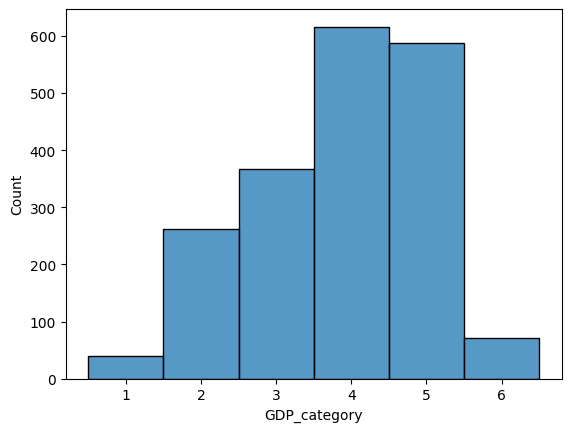

In [ ]:
sns.histplot(df_cleaned["GDP_category"])
plt.show()

## Stratifying using countries

In [ ]:
countries_dummies = df_cleaned.columns[:161]
countries_dummies

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '151', '152', '153', '154', '155', '156', '157', '158', '159', '160'],
      dtype='object', length=161)

In [ ]:
strat_train_set, strat_test_set = train_test_split(df_cleaned, test_size=0.2, stratify=df_cleaned[countries_dummies], random_state=42)

## Comparision and Discussion

In [ ]:
strat_test_set["GDP_category"].value_counts() / len(strat_test_set)

4    0.313625
5    0.303342
3    0.192802
2    0.136247
6    0.035990
1    0.017995
Name: GDP_category, dtype: float64

In [ ]:
df_cleaned["GDP_category"].value_counts() / len(df_cleaned)

4    0.316872
5    0.302469
3    0.188786
2    0.134774
6    0.037037
1    0.020062
Name: GDP_category, dtype: float64

In [ ]:
def GDP_category_proportions(data):
    return data["GDP_category"].value_counts() / len(data)

train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": GDP_category_proportions(df_cleaned),
    "Stratified": GDP_category_proportions(strat_test_set),
    "Random": GDP_category_proportions(test_set),
}).sort_index()
compare_props["Random %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Random %error,Stratified %error
1,0.020062,0.017995,0.017995,-10.302551,-10.302551
2,0.134774,0.136247,0.120823,-10.351459,1.093036
3,0.188786,0.192802,0.169666,-10.127974,2.127302
4,0.316872,0.313625,0.318766,0.597603,-1.024939
5,0.302469,0.303342,0.331620,9.637480,0.288547
6,0.037037,0.035990,0.041131,11.053985,-2.827763


*   To ensure that the test set is representative of the whole dataset, we used Stratified Sampling to create it.
*   First, we divided the data based on the ***GDP category*** to which each instance belongs because the ***Log GDP per capita*** has the highest correlation with the ***Life Ladder***, and we want to preserve the distribution of the most relevant feature in the training and testing sets.
* Initially, we wanted to pick samples from each ***GDP category*** in proportion to its size vis-à-vis the whole dataset. This way, the test set will be representative of the various GDP categories (i.e., representative of the dataset).
* Nonetheless, we also wanted the test set to be represententative of all existing countries. So, we stratified by ***Country name*** to ensure that each country is represented proportionally in both the training and test sets. This will be important in understanding how well the model predicts the ***Life ladder*** for specific countries.
*  The test set obtained using stratified sampling and the dataset show very close values in terms of the ratios of the unique ***GDP_category*** values to the sizes of the sets. This was enough to verify that the test set is indeed representative of the entire dataset, and that the distribution of ***GDP_category*** was maintained. Moreover, just for the sake of comparison (table above), the error rates of the stratified test set are far inferior to those of the randomly generated test set. This demonstrates the effect of stratified sampling in generating testing and training sets.



In [ ]:
#we can drop GDP_category since it will not be of use anymore
for set_ in (strat_train_set, strat_test_set):
    set_.drop("GDP_category", axis=1, inplace=True)

In [ ]:
attributes = strat_train_set.drop("Life Ladder", axis=1)
labels = strat_train_set["Life Ladder"].copy()
attributes.shape, labels.shape

((1555, 169), (1555,))

In [ ]:
#We will need to display scores so we took this function from the book
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.

    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

## Closed-form solution

In [ ]:
#Closed-form solution
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X=attributes, y=labels)

scores = cross_val_score(lin_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.40539857 0.3970787  0.36066072 0.5424637 ]
Mean: 0.4264004214614286
Standard Deviation: 0.06908913721054014


We are not using intercept because of each countries dummies. If we include the intercept then we will face problem of multicollinearity and linearly dependent columns in X



  





## SGD

In [ ]:
#SGD using SciKit
#We tuned the initial learning rate eta0
sgd_reg = SGDRegressor(penalty=None, tol = 1e-3, max_iter=1000, fit_intercept=False, eta0=0.00001)
sgd_reg.fit(X=attributes, y=labels)

scores = cross_val_score(sgd_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.77265406 0.78116581 0.74401798 0.7852468 ]
Mean: 0.7707711620209431
Standard Deviation: 0.016100241084630287


In [ ]:
sgd_reg_train = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, fit_intercept=False, eta0=0.00001, warm_start=True, random_state=42)
sgd_reg_val = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, fit_intercept=False, eta0=0.00001, warm_start=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(attributes, labels, test_size=0.2, random_state=42)
errors = []
errors_validation = []

for epoch in range(10000):
  sgd_reg_val.fit(X_train, y_train)
  y_predict = sgd_reg_val.predict(X_val)
  error = mean_squared_error(y_val, y_predict)**0.5
  errors_validation.append(error)

  sgd_reg_train.fit(attributes, labels)
  y_predict = sgd_reg_train.predict(attributes)
  error = mean_squared_error(labels, y_predict)**0.5
  errors.append(error)

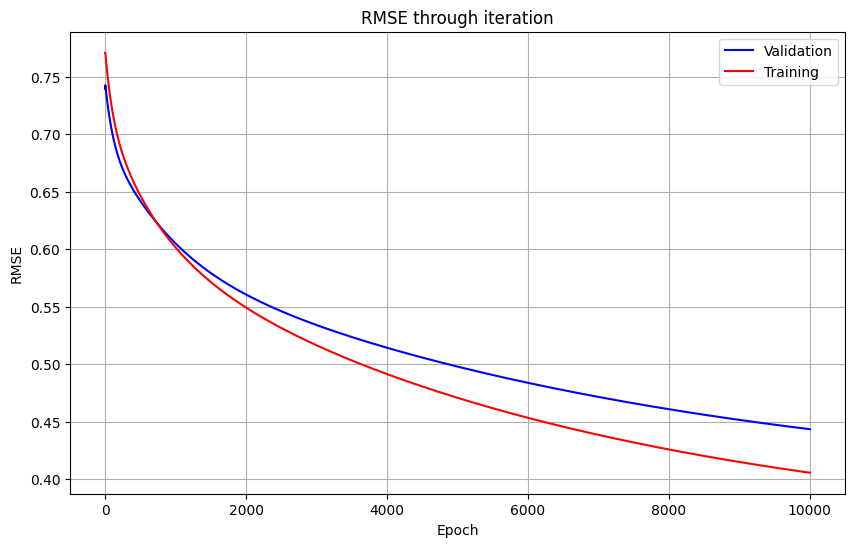

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(10000), errors_validation, label='Validation', color = 'blue')
plt.plot(range(10000), errors, label='Training', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE through iteration')
plt.legend()
plt.grid(True)
plt.show()

## Ridge Regression

In [ ]:
#Ridge
ridge_red = Ridge(alpha=1, solver='auto')
ridge_red.fit(attributes, labels)
scores = cross_val_score(ridge_red, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.4007575  0.39054207 0.35529218 0.40739294]
Mean: 0.3884961739118091
Standard Deviation: 0.020088049464770157


## Lasso Regression

In [ ]:
#Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(attributes, labels)

scores = cross_val_score(lasso_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.76549671 0.7744141  0.73599006 0.77809648]
Mean: 0.7634993370849008
Standard Deviation: 0.016529960781064158


## Elastic net Regression

In [ ]:
#Elastic Net
elastic_reg = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_reg.fit(attributes, labels)

scores = cross_val_score(elastic_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.75643678 0.76433762 0.72823588 0.77237879]
Mean: 0.7553472694259691
Standard Deviation: 0.016636660379791984


## How alpha affects results?

Now lets perform how Alpha affects results

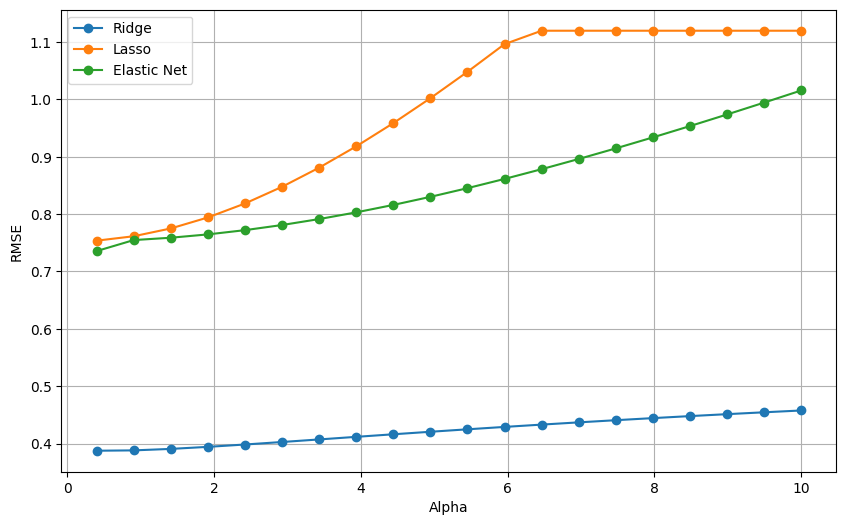

In [ ]:
alpha_range = np.linspace(0.4, 10, 20)
ridge_rmse = []
lasso_rmse = []
elastic_rmse = []

for x in alpha_range:
  ridge_red = Ridge(alpha=x, solver='auto')
  lasso_reg = Lasso(alpha=x)
  elastic_reg = ElasticNet(alpha=x, l1_ratio=0.5)
  scores_ridge = cross_val_score(ridge_red, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  scores_lasso = cross_val_score(lasso_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  scores_elastic_net = cross_val_score(elastic_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  scores_ridge = np.sqrt(-scores_ridge)
  scores_lasso = np.sqrt(-scores_lasso)
  scores_elastic_net = np.sqrt(-scores_elastic_net)
  ridge_rmse.append(scores_ridge.mean())
  lasso_rmse.append(scores_lasso.mean())
  elastic_rmse.append(scores_elastic_net.mean())

plt.figure(figsize=(10, 6))

# Plot RMSE values for Ridge
plt.plot(alpha_range, ridge_rmse, label='Ridge', marker='o', linestyle='-')

# Plot RMSE values for Lasso
plt.plot(alpha_range, lasso_rmse, label='Lasso', marker='o', linestyle='-')

# Plot RMSE values for Elastic Net
plt.plot(alpha_range, elastic_rmse, label='Elastic Net', marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

## Other hyper parameters

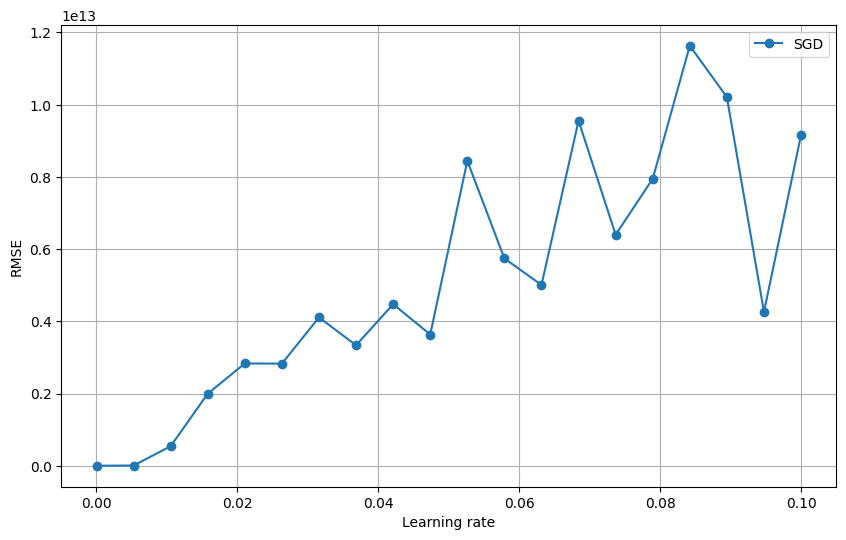

In [ ]:
learning_rates = np.linspace(0.00001, 0.1, 20)
rmse = []

for x in learning_rates:
    sgd_reg = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, fit_intercept=False, eta0=x, random_state=42)
    sgd_reg.fit(X=attributes, y=labels)
    scores = cross_val_score(sgd_reg, attributes, labels, cv=4, scoring='neg_mean_squared_error')
    scores = np.sqrt(-scores)
    rmse.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse, label='SGD', marker='o', linestyle='-')
plt.xlabel('Learning rate')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

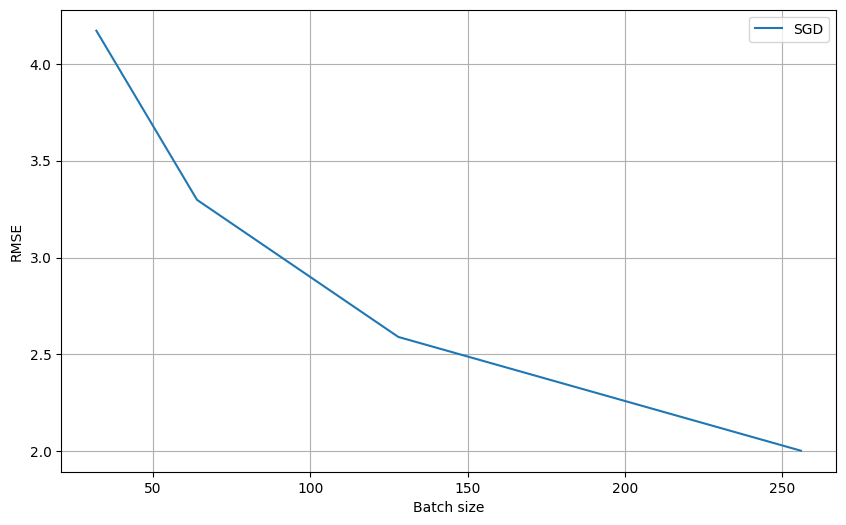

In [ ]:
batch_sizes = [32, 64, 128, 256]
rmse = []

for x in batch_sizes:
    train_batch = strat_train_set.sample(frac=1).reset_index(drop=True)
    attributes_batch = train_batch.drop("Life Ladder", axis=1)[:x]
    labels_batch = train_batch["Life Ladder"].copy()[:x]
    sgd_reg = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, fit_intercept=False, eta0=0.00000001, random_state=42)
    sgd_reg.fit(X=attributes_batch, y=labels_batch)
    scores = cross_val_score(sgd_reg, attributes_batch, labels_batch, cv=4, scoring='neg_mean_squared_error')
    scores = np.sqrt(-scores)
    rmse.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, rmse, label='SGD')
plt.xlabel('Batch size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

So we can crearly see that greater batch is better, smaller learning rate is better, and less regularization is better

## Closed-form polynomial regression

In [ ]:
#numeric attributes
numeric_cols = attributes.iloc[:, 161:].columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2, include_bias=False), numeric_cols)
    ],
    remainder='passthrough'  #keep one-hot encoded columns as is
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

#transform attributes using the pipeline
attributes_poly = pipeline.fit_transform(attributes)
attributes_poly.shape

(1555, 205)

In [ ]:
lin_reg_pol = LinearRegression(fit_intercept=False)
lin_reg_pol.fit(X=attributes_poly, y=labels)

scores = cross_val_score(lin_reg, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [0.40654116 0.38547557 0.36604872 0.61934748]
Mean: 0.4443532320500236
Standard Deviation: 0.1020427775816153


*   Only numeric features are transformed using PolynomialFeatures and dummy attributes (result of one-hot encoding) to maintain a reasonable number of features.
*   Polynomial regression of degree 2 yielded the best performance as opposed to higher degrees that exhibited high variability across validation scores indicating overfitting.   






## Polynomial regression using SGD


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(attributes_poly, labels, test_size=0.2, random_state=42)

sgd_reg_pol = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, fit_intercept=False, eta0=0.00001, warm_start=True, random_state=42)

train_losses = []
val_losses = []

epochs = 10000

for epoch in range(epochs):
  #fitting in smaller batches because of the large number of attributes
  sgd_reg_pol.partial_fit(X_train, y_train)

  y_train_predict = sgd_reg_pol.predict(X_train)
  train_loss = mean_squared_error(y_train, y_train_predict)**0.5
  train_losses.append(train_loss)

  y_val_predict = sgd_reg_pol.predict(X_val)
  val_loss = mean_squared_error(y_val, y_val_predict)**0.5
  val_losses.append(val_loss)

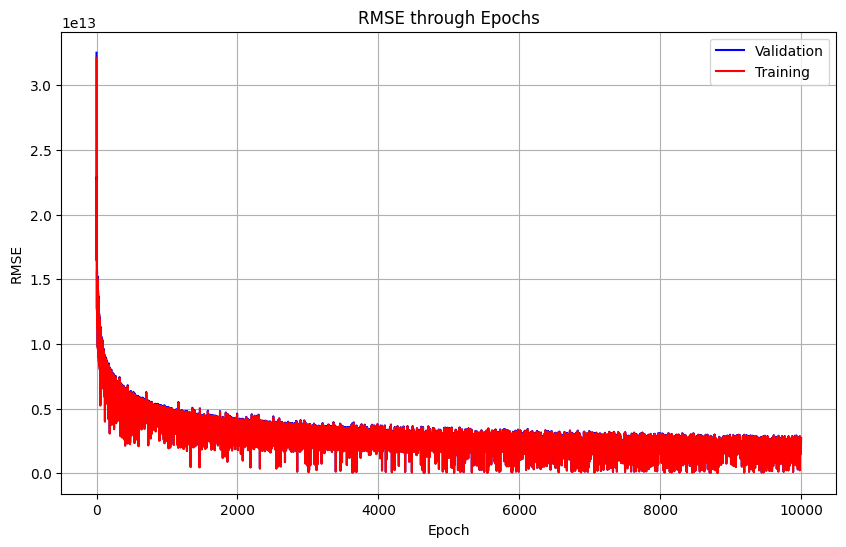

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(10000), val_losses, label='Validation', color = 'blue')
plt.plot(range(10000), train_losses, label='Training', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE through Epochs')
plt.legend()
plt.grid(True)
plt.show()

*   It seems like the model does not overfit the training data. The evolvement of the training and validation losses through iterations indicates a good balance between fitting the training data and generalizing to unseen data.

## Regularization

### Ridge regression

In [ ]:
#Ridge - alpha = 1
ridge_reg_pol = Ridge(alpha=1, solver='auto')
ridge_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(ridge_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.39513831 0.38644417 0.34989    0.40070696]
Mean: 0.38304486084397305
Standard Deviation: 0.019805309876166393


In [ ]:
#Ridge - alpha = 10
ridge_reg_pol = Ridge(alpha=10, solver='auto')
ridge_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(ridge_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.44803025 0.42820375 0.41399162 0.44284372]
Mean: 0.4332673355292238
Standard Deviation: 0.013293266784976202


In [ ]:
#Ridge - alpha = 100
ridge_reg_pol = Ridge(alpha=100, solver='auto')
ridge_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(ridge_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.52438346 0.50279423 0.49791806 0.51603627]
Mean: 0.5102830070697432
Standard Deviation: 0.010498769942271072


*   With alpha = 0, Ridge regression is just plain linear regression.
*   Increasing alpha, on the other hand, from 1 to 100, shows an increase in performance and a decrease in variability across validation scores. While reducing the model's variance, we are, nevertheless, increasing its bias.



### Lasso regression

In [ ]:
#Lasso - alpha = 0.1
lasso_reg_pol = Lasso(alpha=0.1)
lasso_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(lasso_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.54400733 0.53191525 0.51906341 0.54733972]
Mean: 0.5355814306924891
Standard Deviation: 0.011130354085732546


In [ ]:
#Lasso - alpha = 0.5
lasso_reg_pol = Lasso(alpha=0.5)
lasso_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(lasso_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.55125544 0.54117663 0.5337392  0.56039627]
Mean: 0.5466418857627866
Standard Deviation: 0.010084844755827656


In [ ]:
#Lasso - alpha = 1
lasso_reg_pol = Lasso(alpha=1)
lasso_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(lasso_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.5817733  0.57170565 0.57380147 0.59184312]
Mean: 0.5797808834753251
Standard Deviation: 0.00791249228874042


*   Larger alpha values can help mitigate overfitting.
*   The PolynomialFeatures transformation yielded a large number of features. Lasso regression, with higher alpha values, tends to keep only the most relevant features, which makes it ideal for feature selection and diminishing the model's complexity.



### Elastic net

In [ ]:
#Elastic Net - alpha = 0.5
elastic_reg_pol = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(elastic_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.54489827 0.53373546 0.52292391 0.55105986]
Mean: 0.5381543759663181
Standard Deviation: 0.010764820492822399


In [ ]:
#Elastic Net - alpha = 1
elastic_reg_pol = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(elastic_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.55154147 0.54144312 0.53445688 0.56075177]
Mean: 0.547048309109585
Standard Deviation: 0.009974161853619736


In [ ]:
#Elastic Net - alpha = 10
elastic_reg_pol = ElasticNet(alpha=10, l1_ratio=0.5)
elastic_reg_pol.fit(attributes_poly, labels)

scores = cross_val_score(elastic_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
mse_scores = np.sqrt(-scores)
display_scores(mse_scores)

Scores: [0.66991616 0.66790239 0.66405335 0.67854737]
Mean: 0.6701048190860759
Standard Deviation: 0.005309974736269337


*   As alpha increases for Elastic Net with a fixed balance between Ridge and Lasso, both Lasso and Ridge penalties become stronger. This prevents overfitting (especially since there are plenty of features) by driving sparsity in the coefficient values and lowering the complexity of the model.


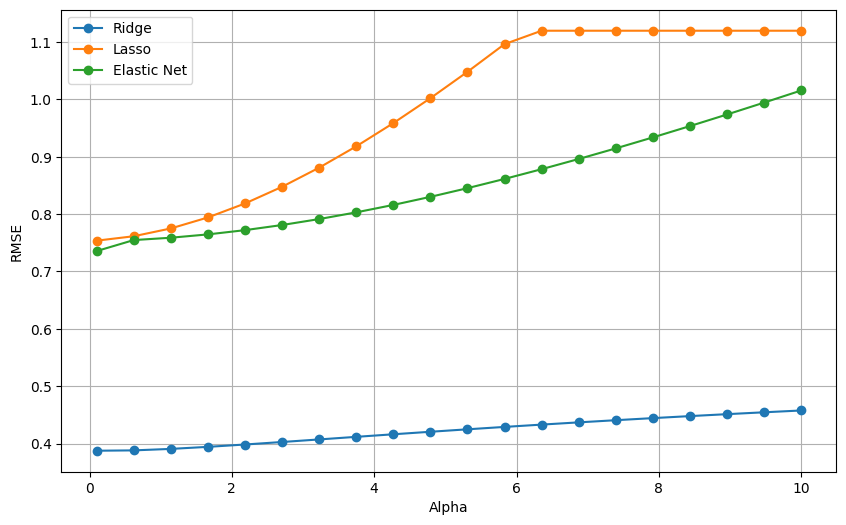

In [ ]:
alpha_range = np.linspace(0.1, 10, 20)
ridge_pol_rmse = []
lasso_pol_rmse = []
elastic_pol_rmse = []

for x in alpha_range:
  ridge_red_pol = Ridge(alpha=x, solver='auto')
  lasso_reg_pol = Lasso(alpha=x)
  elastic_reg_pol = ElasticNet(alpha=x, l1_ratio=0.5)
  scores_ridge_pol = cross_val_score(ridge_red_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  scores_lasso_pol = cross_val_score(lasso_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  scores_elastic_net = cross_val_score(elastic_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  scores_ridge_pol = np.sqrt(-scores_ridge_pol)
  scores_lasso_pol = np.sqrt(-scores_lasso_pol)
  scores_elastic_net_pol = np.sqrt(-scores_elastic_net)
  ridge_pol_rmse.append(scores_ridge.mean())
  lasso_pol_rmse.append(scores_lasso_pol.mean())
  elastic_pol_rmse.append(scores_elastic_net.mean())

plt.figure(figsize=(10, 6))

# Plot RMSE values for Ridge
plt.plot(alpha_range, ridge_rmse, label='Ridge', marker='o', linestyle='-')

# Plot RMSE values for Lasso
plt.plot(alpha_range, lasso_rmse, label='Lasso', marker='o', linestyle='-')

# Plot RMSE values for Elastic Net
plt.plot(alpha_range, elastic_rmse, label='Elastic Net', marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

*   With alpha taking different values between 0.1 and 10, it appears that Ridge regression brings about the lowest RMSE values, notably, with alpha closer to 0. This suggests, that  only slight regularization is needed for a better performance, which is convenient since all features will remain in the model.




## Hyperparameter tuning and description

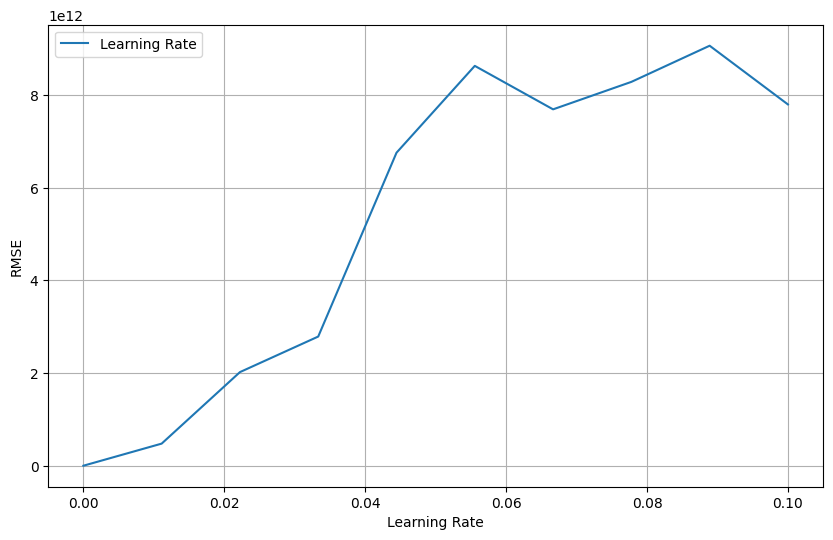

In [ ]:
learning_rates = np.linspace(0.00001, 0.1, 10)
lr_rmse = []

for x in learning_rates:
  sgd_reg_pol = SGDRegressor(penalty=None, tol = 1e-3, max_iter=10000, fit_intercept=False, eta0=x)
  sgd_reg_pol.fit(X=attributes_poly, y=labels)
  scores = cross_val_score(sgd_reg_pol, attributes, labels, cv=4, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  lr_rmse.append(rmse_scores.mean())

plt.figure(figsize=(10, 6))

plt.plot(learning_rates, lr_rmse, label='Learning Rate')

plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

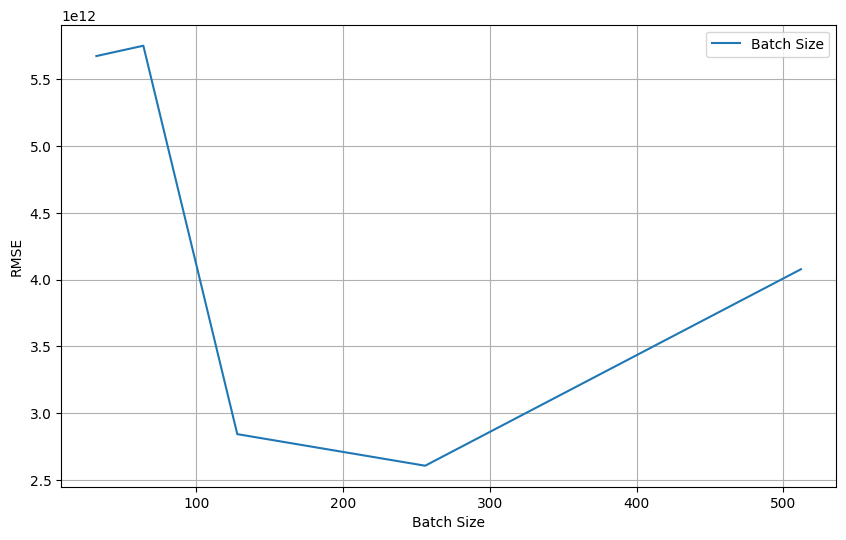

In [ ]:
batch_sizes = [32, 64, 128, 256, 512]
batch_rmse = []

np.random.seed(42)

y = np.array(labels)

sgd_reg_pol = SGDRegressor(penalty=None, tol=1e-3, max_iter=10000, fit_intercept=False, eta0=0.00001)

for batch_size in batch_sizes:
  shuffled_indices = np.random.permutation(len(attributes_poly))
  X_shuffled = attributes_poly[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, attributes_poly.shape[0], batch_size):
    X_batch = X_shuffled[i:i+batch_size]
    y_batch = y_shuffled[i:i+batch_size]
    sgd_reg_pol.fit(X_batch, y_batch)
  scores = cross_val_score(sgd_reg_pol, attributes_poly, labels, cv=4, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  batch_rmse.append(rmse_scores.mean())

plt.figure(figsize=(10, 6))

plt.plot(batch_sizes, batch_rmse, label='Batch Size')

plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

*   Upon fine tuning the model, it is safe to say that the following hyperparameters would optimize its performance:
  * Penalty: l2 (Ridge regression with alpha as low as 0.1)
  * Learning rate: 0.00001
  * Batch size: 256




## Selecting the final model with selcted hyperparameters

## Preparing the testing set

In [ ]:
attributes_test = strat_test_set.drop("Life Ladder", axis=1)
labels_test = strat_test_set["Life Ladder"].copy()
attributes_test.shape, labels_test.shape

((389, 169), (389,))

## Making predictions using the final model

In [ ]:
learning_rate = 1e-05
ridge_reg_pol_final = Ridge(alpha=1, solver='auto')
ridge_reg_pol_final.fit(attributes, labels)

prediction = ridge_reg_pol_final.predict(attributes_test)

In [ ]:
dict(zip(attributes.columns, ridge_reg_pol_final.coef_))

{'0': -0.04814702212788337,
 '1': -0.1388362239726009,
 '2': 0.23214532423159537,
 '3': 0.009129240263452293,
 '4': 0.24291200078027383,
 '5': -0.12108198180079434,
 '6': 0.3143254850804202,
 '7': 0.30957617108600755,
 '8': -0.2733080862776952,
 '9': -0.32438699309540187,
 '10': 0.284479632355202,
 '11': 0.029830484409685335,
 '12': 0.3384488600116849,
 '13': 0.6097435501845695,
 '14': -0.09802915843809738,
 '15': -0.36119862406642894,
 '16': 0.5496194457469693,
 '17': 0.14842848791667662,
 '18': -1.4560329005743389,
 '19': 0.80332536664581,
 '20': -0.8527386470993007,
 '21': 0.08496631322939412,
 '22': 0.30338955464209766,
 '23': -0.6080258977375473,
 '24': 0.22968815560724803,
 '25': 0.41772454556476135,
 '26': 0.26397065806402115,
 '27': 0.44348584195187696,
 '28': 0.39468721368789356,
 '29': -0.5305453061222108,
 '30': 0.46381404512685315,
 '31': -0.2903889775360417,
 '32': 0.23795153021520757,
 '33': 0.6029628879551188,
 '34': 0.9836602887964264,
 '35': 0.14041193120928172,
 '36':

## RMSE

In [ ]:
print('RMSE =', mean_squared_error(labels_test, prediction)**.5)

RMSE = 0.3602684093629458


Root of mean squared error is an extension of mean squared error, with the added advantage of having the same units as the predicted variable (life ladder in this case), this makes comparision much more easier and intuitive to explain.

In our case RMSE is very close to zero which suggest that our final model is performing well, and predicting the values close to actual values. On average the predictions of our model differ by approximatly 0.36 units from the actual value.

## Future Work

1.   With the limited amout of data the model has already perfomed exceptionally well. The data had several issues, especially because of missing values, which were dealt with using several assumptions. More cleaner data will help improve the results. Having said that, it would be interesting to see how the results vary if we use different imputatioin techniques (such as instead of using country's median, we use mean. Another complex method will be to predict the missing value using a linear estimator based on previous year's values for the missing attribute)
2.   Although the scatter plot does not reveal any non linear relationship between the variables and polynomial regression did not provide any significant advantage in predicting, it will be interesting to use non linear models in future.
3.   Instead of predicting the exact values of life ladder, we can split it into distinct categories (very low, low, average, high, very high) and then use classification models like SVM and logistic regression. Such models can provide new insights into the problem

